In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
df.shape

(16598, 11)

In [ ]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
top_videogames = df[['Rank', 'Name', 'Global_Sales']].groupby('Name').sum().sort_values(by='Global_Sales', ascending=False)
top_videogames.head(10)

,Rank,Global_Sales
Name,,
Wii Sports,1,82.74
Grand Theft Auto V,2182,55.92
Super Mario Bros.,203,45.31
Tetris,162,35.84
Mario Kart Wii,3,35.82
Wii Sports Resort,4,33.00
Pokemon Red/Pokemon Blue,5,31.37
Call of Duty: Black Ops,5795,31.03
Call of Duty: Modern Warfare 3,3459,30.83


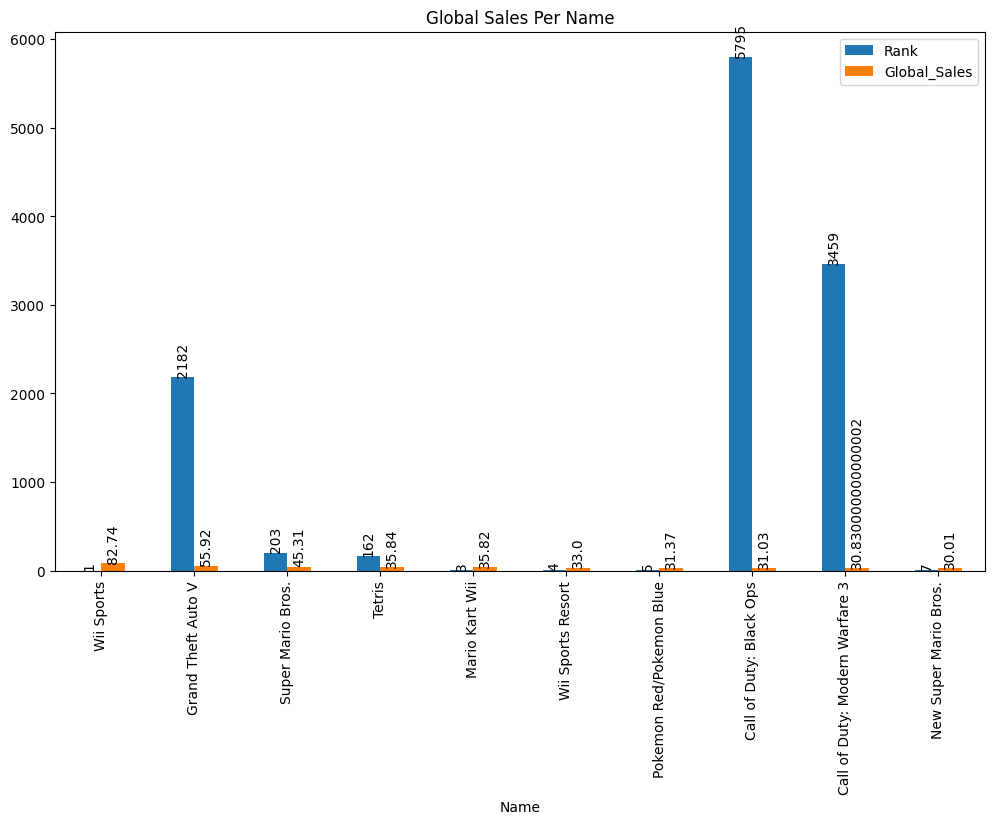

In [ ]:
ax = top_videogames.head(10).plot(kind='bar', figsize=(12, 7), title='Global Sales Per Name')
for p in ax.patches:ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), rotation=90, ha='center', va='bottom')
plt.show()

In [ ]:
top_rank = df[['Rank', 'Name',]].groupby('Name').sum().sort_values(by='Rank', ascending=True)
top_rank.head(10)

,Rank
Name,
Wii Sports,1
Mario Kart Wii,3
Wii Sports Resort,4
Pokemon Red/Pokemon Blue,5
New Super Mario Bros.,7
Wii Play,8
New Super Mario Bros. Wii,9
Duck Hunt,10
Nintendogs,11


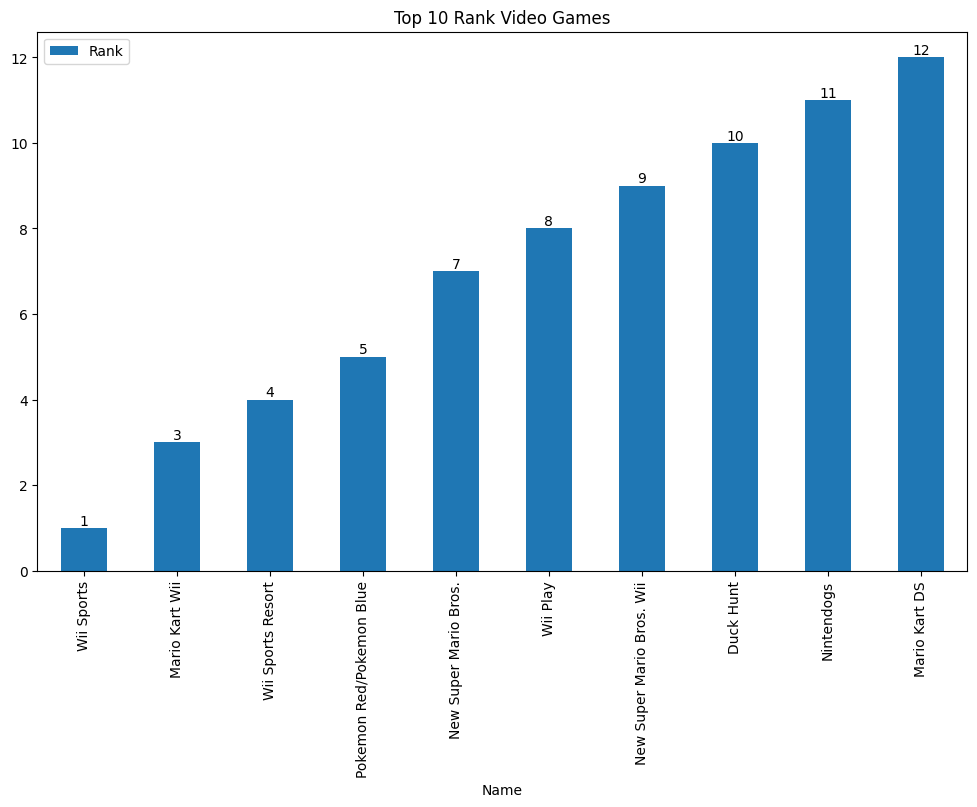

In [ ]:
ax = top_rank.head(10).plot(kind='bar', figsize=(12, 7), title='Top 10 Rank Video Games')
for p in ax.patches:ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.show()

array([<Axes: ylabel='Global_Sales'>], dtype=object)

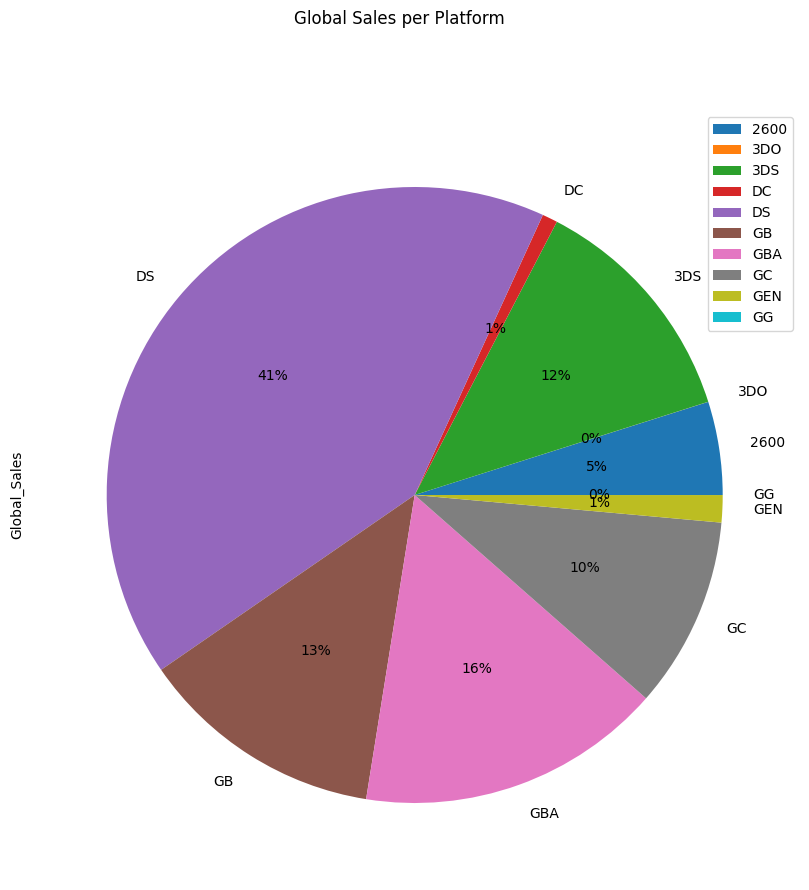

In [ ]:
top_platform = df[['Platform', 'Global_Sales',]].groupby('Platform').sum().sort_values(by='Platform', ascending=True)
top_platform.head(10).plot(kind='pie', subplots=True, figsize=(12,10),title='Global Sales per Platform',autopct='%1.0f%%')

<Axes: title={'center': 'G Release Distribution'}, ylabel='Frequency'>

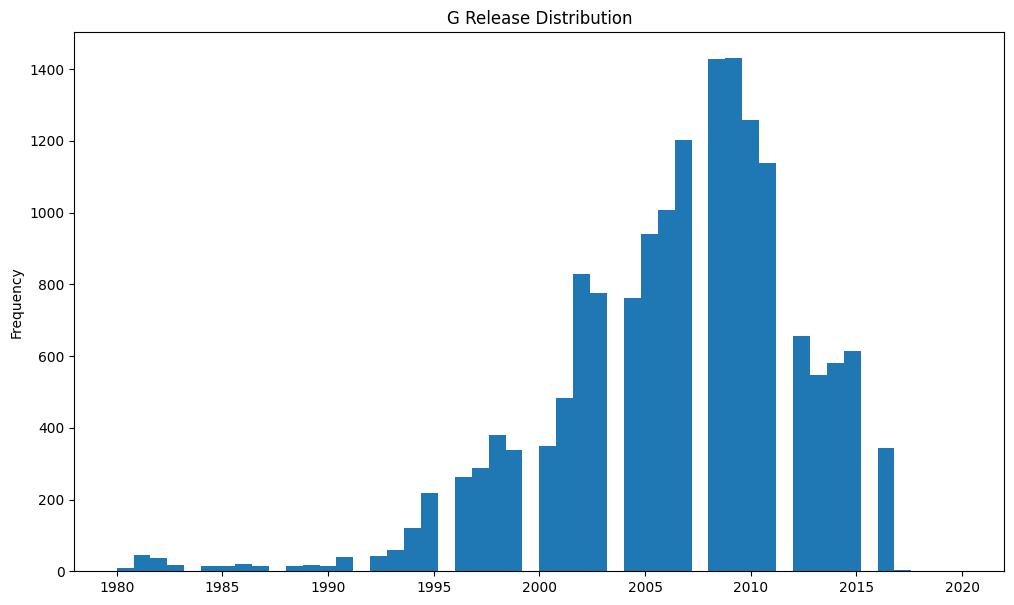

In [ ]:
df['Year'].plot(kind='hist',bins=50, figsize=(12,7),title='G Release Distribution')

In [ ]:
df['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

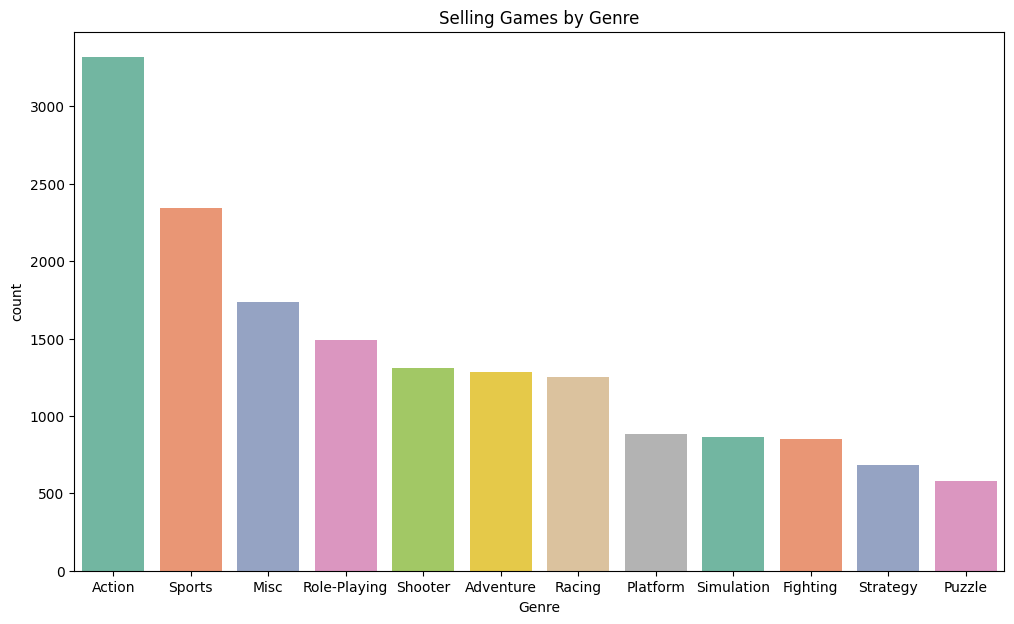

In [ ]:
plt.figure(figsize=(12, 7))
plt.title('Selling Games by Genre')
sns.countplot(data=df, x='Genre', order=df['Genre'].value_counts().index, palette='Set2')
plt.show()

In [ ]:
comp = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales']]
comp_map = comp.groupby(by=['Genre']).sum()

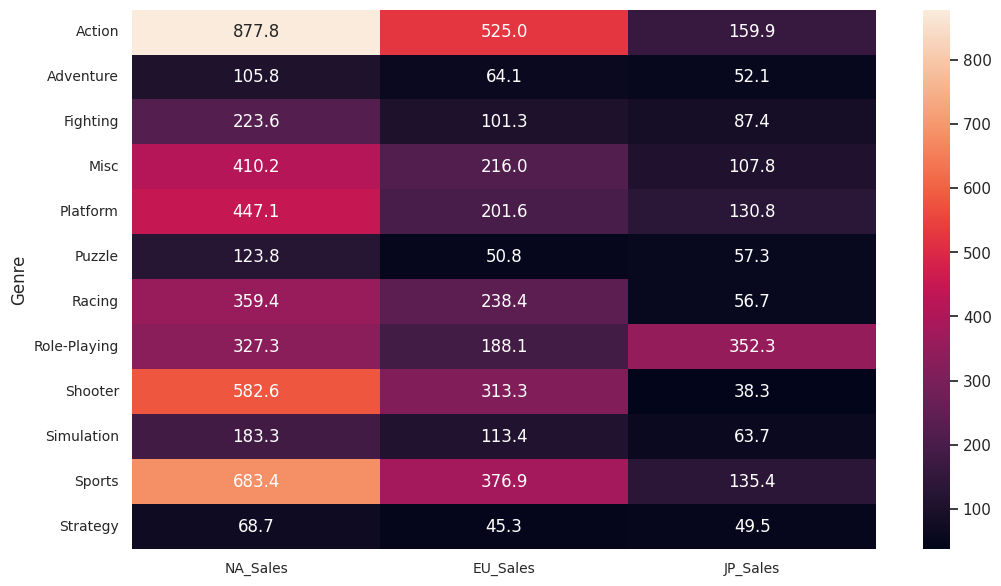

In [ ]:
plt.figure(figsize=(12, 7))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt = '.1f')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [ ]:
comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()

,Genre,Sale_Area,Sale_Price
0,Action,NA_Sales,877.83
1,Adventure,NA_Sales,105.80
2,Fighting,NA_Sales,223.59
3,Misc,NA_Sales,410.24
4,Platform,NA_Sales,447.05


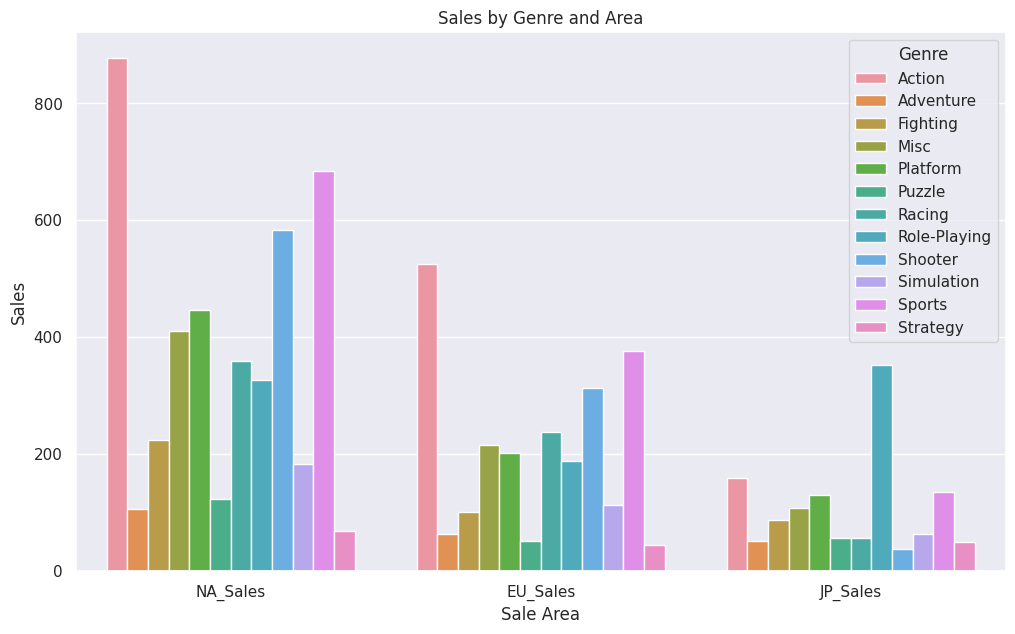

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(data=comp_table, x='Sale_Area', y='Sale_Price', hue='Genre')
plt.title('Sales by Genre and Area')
plt.xlabel('Sale Area')
plt.ylabel('Sales')
plt.show()

In [ ]:
comp_platform = df[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales']]
comp_platform.head()

,Platform,NA_Sales,EU_Sales,JP_Sales
0,Wii,41.49,29.02,3.77
1,NES,29.08,3.58,6.81
2,Wii,15.85,12.88,3.79
3,Wii,15.75,11.01,3.28
4,GB,11.27,8.89,10.22


In [ ]:
comp_platform = comp_platform.groupby(by=['Platform']).sum().reset_index()

In [ ]:
comp_platform = pd.melt(comp_platform, id_vars=['Platform'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_platform.head()

,Platform,Sale_Area,Sale_Price
0,2600,NA_Sales,90.60
1,3DO,NA_Sales,0.00
2,3DS,NA_Sales,78.87
3,DC,NA_Sales,5.43
4,DS,NA_Sales,390.71


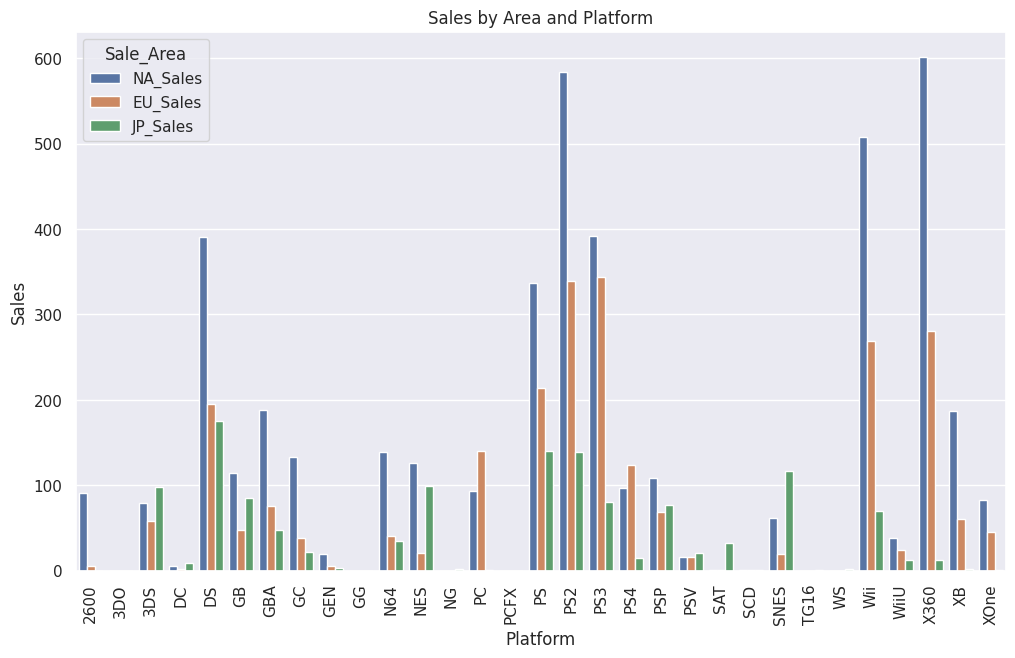

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(data=comp_platform, x='Platform', y='Sale_Price', hue='Sale_Area')
plt.title('Sales by Area and Platform')
plt.xlabel('Platform')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

In [ ]:
top10_platform = df['Platform'].value_counts().sort_values(ascending=False).head(10)

In [ ]:
import plotly.express as px
fig = px.line(top10_platform, title='TOP 10 PLATFORM',
             labels={
                    'value':"Count",
                    'index':"Name of Platform"
             })
fig.show()

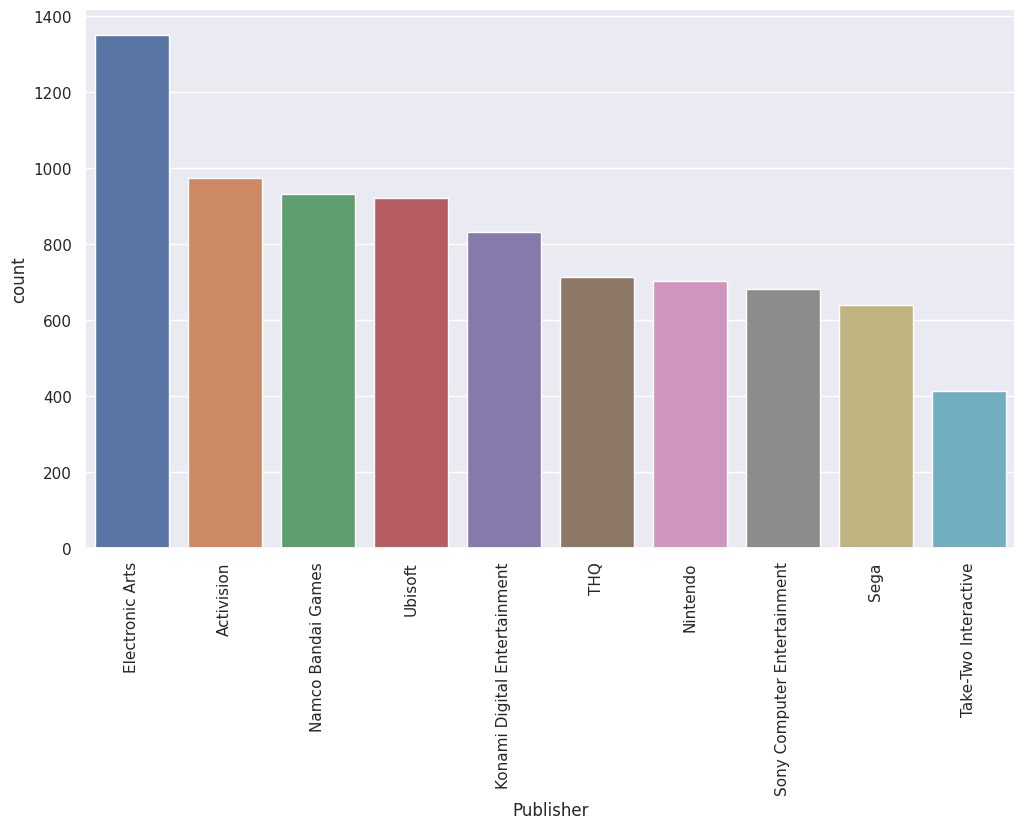

In [ ]:
rank_publisher = df.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).head(10)
rank_publisher = pd.DataFrame(rank_publisher).reset_index()
plt.figure(figsize=(12, 7))
sns.countplot(x="Publisher", data=df, order=df.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

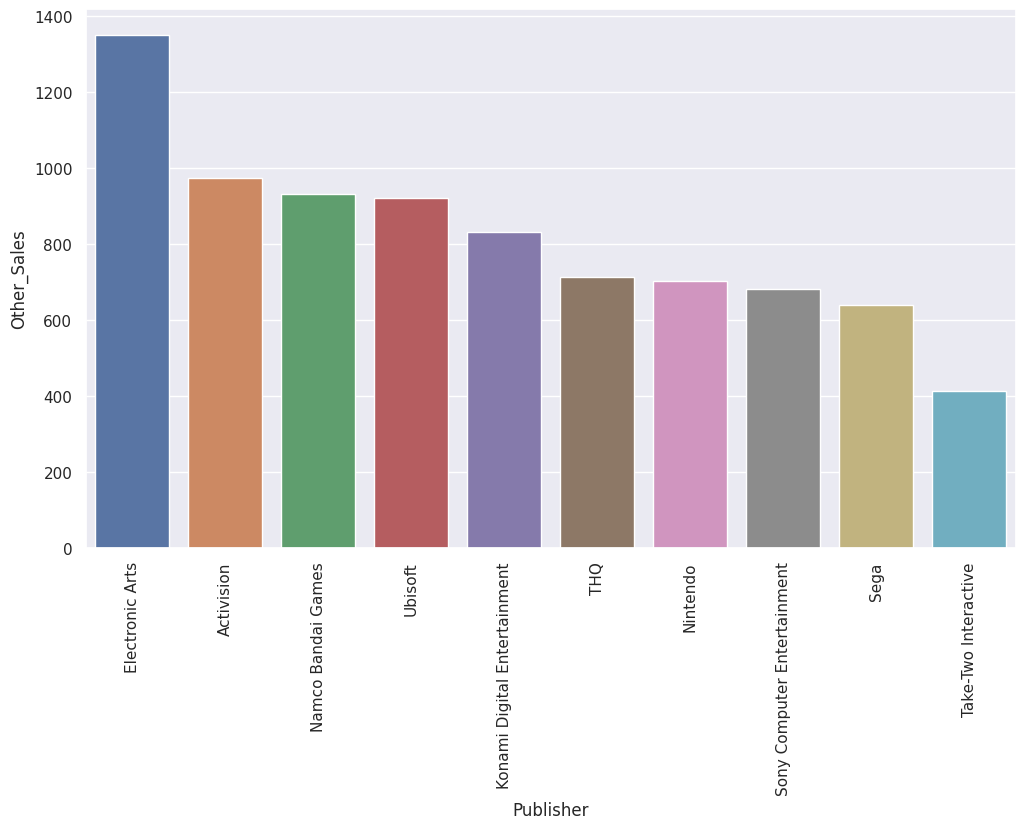

In [ ]:
sale_other = df.groupby(by=['Publisher'])['Other_Sales'].count().sort_values(ascending=False).head(10)
sale_other = pd.DataFrame(sale_other).reset_index()
plt.figure(figsize=(12, 7))
sns.barplot(x="Publisher", y="Other_Sales", data=sale_other)
plt.xticks(rotation=90)
plt.show()